## Codio Activity 7.2: Defining, Computing, and Optimizing Loss

**Expected Time = 60 Minutes**

**Total Points = 20 Points**

This activity focuses on computing and minimizing the L2 loss for different values of theta and identifying the theta that minimizes L2 loss.  

## Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)
- [Problem 5](#Problem-5)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### The Dataset

The geyser data from seaborn is loaded below.  You are to again build a model using waiting time to predict geyser explosion duration, however this model will not have an intercept term.  

In [2]:
geyser = sns.load_dataset('geyser')

In [3]:
geyser.head()

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long


[Back to top](#Index:) 

## Problem 1

### Creating an array of $\theta$'s

**4 Points**

Below, create an array of 100 equally spaced values between -1 and 1.  Use the `np.linspace` method demonstrated in the lectures and assign your answer as a numpy array to `thetas` below.

In [15]:
### GRADED

thetas = ''

### BEGIN SOLUTION
thetas = np.linspace(-1, 1, 100)
### END SOLUTION

# Answer check
print(type(thetas))
print(thetas.shape)

<class 'numpy.ndarray'>
(100,)


In [16]:
### BEGIN HIDDEN TESTS
thetas_ = np.linspace(-1, 1, 100)
#
#
#
assert type(thetas_) == type(thetas)
np.testing.assert_array_equal(thetas_,thetas)
### END HIDDEN TESTS

[Back to top](#Index:) 

## Problem 2

### The Model

**4 Points**

In this assignment, our model takes the form:

$$\text{duration} = \text{waiting} \times \theta$$

Create prediction for the case of $\theta = 0.8$ and assign them as a Series to `prediction` below.

In [19]:
### GRADED

prediction = ''

### BEGIN SOLUTION
prediction = 0.8*geyser['waiting']
### END SOLUTION

# Answer check
print(type(prediction))
print(prediction.shape)

<class 'pandas.core.series.Series'>
(272,)


In [20]:
### BEGIN HIDDEN TESTS
prediction_ = 0.8*geyser['waiting']
#
#
#
assert type(prediction_) == type(prediction)
pd.testing.assert_series_equal(prediction, prediction_)
### END HIDDEN TESTS

[Back to top](#Index:) 

## Problem 3

### Determining Mean Squared Error

**4 Points**

Using the predictions with $\theta = 0.8$, compute the mean squared error based on the true values of duration.  Assign your result as a float to `mse` below.

In [21]:
### GRADED

mse = ''

### BEGIN SOLUTION
mse = float(mean_squared_error(geyser['duration'], 0.8*geyser['waiting']))
### END SOLUTION

# Answer check
print(type(mse))
print(mse)

<class 'float'>
2930.2861285845593


In [22]:
### BEGIN HIDDEN TESTS
mse_ = float(mean_squared_error(geyser['duration'], 0.8*geyser['waiting']))
#
#
#
assert type(mse_) == type(mse)
assert mse == mse_
### END HIDDEN TESTS

[Back to top](#Index:) 

## Problem 4

### Computing the Mean Squared Error for `thetas`

**4 Points**

Now, use your array `thetas` to compute the mean squared error for each.  Assign these values in order to the list `mses` below.

In [26]:
### GRADED

mses = []

### BEGIN SOLUTION
for theta in thetas:
    mse = float(mean_squared_error(geyser['duration'], theta*geyser['waiting']))
    mses.append(mse)
### END SOLUTION

# Answer check
print(type(mses))
print(len(mses))
print(mses[:10])

<class 'list'>
100
[5746.399297702205, 5527.445557830223, 5312.744883371734, 5102.29727432674, 4896.102730695238, 4694.161252477228, 4496.472839672713, 4303.037492281691, 4113.855210304161, 3928.925993740124]


In [27]:
### BEGIN HIDDEN TESTS
mses_ = []
for theta in thetas:
    mse_ = float(mean_squared_error(geyser['duration'], theta*geyser['waiting']))
    mses_.append(mse_)
#
#
#
assert type(mses_) == type(mses)
assert mses == mses_
### END HIDDEN TESTS

[Back to top](#Index:) 

## Problem 5

### Which $\theta$ minimizes Mean Squared Error

**4 Points**

Using the list of `mses`, determine the value for $\theta$ that minimized the mean squared error.  You may want to ammend your loop above to check for the smallest value as the loop proceeds.  Assign your answer as a float to `theta_min` below.

In [28]:
### GRADED

theta_min = ''

### BEGIN SOLUTION
theta_min = None
min_mse = None
for theta in thetas:
    mse = float(mean_squared_error(geyser['duration'], theta*geyser['waiting']))
    if min_mse == None:
        theta_min = theta
        min_mse = mse
    elif min_mse > mse:
        min_mse = mse
        theta_min = theta

### END SOLUTION

# Answer check
print(type(theta_min))
print(min_mse)
print(theta_min)

<class 'numpy.float64'>
0.3695626511606713
0.05050505050505061


In [13]:
### BEGIN HIDDEN TESTS
theta_min_ = None
min_mse_ = None
for theta in thetas:
    mse = float(mean_squared_error(geyser['duration'], theta*geyser['waiting']))
    if min_mse_ == None:
        theta_min_ = theta
        min_mse_ = mse
    elif min_mse_ > mse:
        min_mse_ = mse
        theta_min_ = theta
#
#
#
assert type(theta_min_) == type(theta_min)
assert theta_min == theta_min_
### END HIDDEN TESTS

Note that again the shape of the Mean Squared Error is a parabola.  The plot below shows the values of thetas againt their mean squared error.  

<center>
    <img src = 'images/mse_min.png' >
</center>

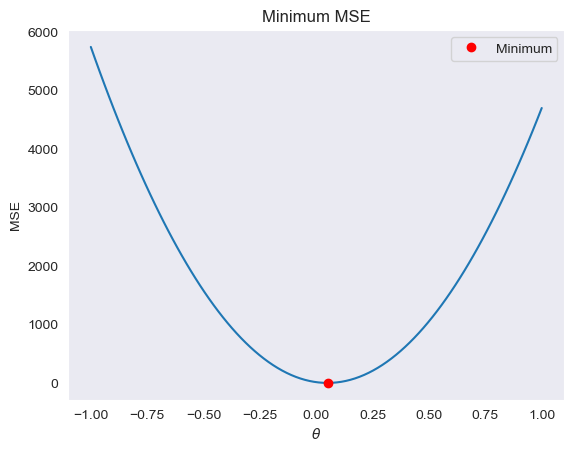

In [34]:
#Code for Plot
plt.plot(thetas, mses)
plt.plot(thetas[np.argmin(mses)], min(mses), 'ro', label = 'Minimum')
plt.legend()
plt.title('Minimum MSE')
plt.xlabel(r'$\theta$')
plt.ylabel('MSE')
plt.grid();
plt.savefig('images/mse_min.png')